In [ ]:
# Import Necessary Libraries
import pandas as pd # Imports the pandas library for data manipulation, aliased as 'pd'
import numpy as np # Imports the numpy library for numerical computations, aliased as 'np'
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder # Imports specific preprocessing tools from scikit-learn
from sklearn.decomposition import PCA # Imports Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif # Imports feature selection tools
from sklearn.impute import SimpleImputer # Imports the SimpleImputer class for handling missing values
from scipy.stats import chi2_contingency, f_oneway # Imports statistical tests
from scipy.stats import pearsonr # Imports the Pearson correlation function
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('MovieRecSys.csv', encoding='latin-1') # Reads the CSV file into a pandas DataFrame

In [ ]:
print(df)

      ï»¿User_ID                                Title Name Language Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English     2020   
1             13                           Black Hawk Down  English     2001   
2             20                                    Canvas  English     2020   
3             12  Captain Underpants: The First Epic Movie      NaN     2017   
4             13                            Ella Enchanted      NaN     2004   
...          ...                                       ...      ...      ...   
4443          17                           Mae Martin: SAP  English     2023   
4444          15       Michela Giraud: The Truth, I Swear!  Italian     2022   
4445           9                              The Disciple  Marathi     2020   
4446          23                             The Privilege   German     2022   
4447          12               Barbie & the Diamond Castle  English     2008   

     Age_Rating  IMDb  
0             G

In [ ]:
# Convert 'IMDb' column to numerical and remove '/10'
df['IMDb'] = df['IMDb'].astype(str).str.rstrip('/10')  # Convert to string first
df['IMDb'] = pd.to_numeric(df['IMDb'], errors='coerce')

print(df)

      ï»¿User_ID                                Title Name Language Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English     2020   
1             13                           Black Hawk Down  English     2001   
2             20                                    Canvas  English     2020   
3             12  Captain Underpants: The First Epic Movie      NaN     2017   
4             13                            Ella Enchanted      NaN     2004   
...          ...                                       ...      ...      ...   
4443          17                           Mae Martin: SAP  English     2023   
4444          15       Michela Giraud: The Truth, I Swear!  Italian     2022   
4445           9                              The Disciple  Marathi     2020   
4446          23                             The Privilege   German     2022   
4447          12               Barbie & the Diamond Castle  English     2008   

     Age_Rating  IMDb  
0             G

In [ ]:
# Check for missing values before removing unnamed columns
print("Missing values before removing unnamed columns:\n", df.isnull().sum())

Missing values before removing unnamed columns:
 ï»¿User_ID     0
Title Name     0
Language      34
Released      35
Age_Rating     7
IMDb           0
dtype: int64


In [ ]:
# Count the number of unique languages
num_languages = df['Language'].nunique()
# Print the result
print(f"There are {num_languages} unique languages in the dataset.")

There are 74 unique languages in the dataset.


In [ ]:
# Get unique languages
unique_languages = df['Language'].unique() # Gets the unique languages in the 'Language' column
# Print the unique languages
print("Unique Languages in the Dataset:")

Unique Languages in the Dataset:


In [ ]:
# Prints a header
for language in unique_languages: # Iterates through each unique language
    print(language)# Prints the current language

English
nan
Filipino
Tamil
Japanese
Englihs
Spanish
Yiddish
Hindi
French
Russian
Italian
Mandarin
Dari
Norwegian
German
Chinese
Persian
Arabic
Portuguese
Korean
Polish
Indonesian
Marathi
Turkish
Cantonese
Malayalam
Thai
Telugu
Urdu
Icelandic
Telegu
Tamil / Hindi / Telegu / Malayalam / Kannada
Wolof
Swahili
Punjabi
Zulu
Bengali
Tamil & Hindi
Dutch
Malay
Kannada
Vietnamese
Yoruba
Hebrew
Swedish
Tamil, Telugu, Malayalam, Kannada
Malayalam, Hindi, Tamil, Telugu, Kannada
Tagalog
Comedy
Bangla
Xhosa
Tamil & Telegu
Ibo
Danish
Tamil, Hindi, Kannada, Malayalam, Telugu
Ijaw
Finnish
Min Nan
Afrikaans
Khmer
Navajo
TV-MA
Hungarian
tt7866320
Romanian
Catalan
Telugu, Tamil, Kannada
Ukranian
Albanian
Swiss German
Brazilian Portuguese
87 mins
Georgian
Pashtu


In [ ]:
# Find rows with empty 'Language'
empty_language_rows = df[df['Language'].isnull()]
# Print the empty rows
print("Rows with empty 'Language':") # Prints a header
print(empty_language_rows) # Prints the rows with missing 'Language' values

Rows with empty 'Language':
      ï»¿User_ID                                 Title Name Language Released  \
3             12   Captain Underpants: The First Epic Movie      NaN     2017   
4             13                             Ella Enchanted      NaN     2004   
22            12                                    Dheepan      NaN     2015   
23            30                 Nowitzki: The Perfect Shot      NaN     2014   
24            17                   Smurfs: The Lost Village      NaN     2017   
25            23                              The Boss Baby      NaN     2017   
26            12                                   The Wave      NaN     2015   
27            14                                       Veve      NaN     2014   
79            11                              Kung Fu Panda      NaN     2008   
154            3                        The Prince of Egypt      NaN     1998   
166           31                                     Trolls      NaN     2016   


In [ ]:
# Create a dictionary mapping movie titles to languages
movie_language_mapping = {
    '7 Khoon Maaf': 'Hindi',
    '7 años': 'Spanish',
    'Backcountry': 'English',
    'Black Is Beltza': 'Spanish',
    'Blue Mountain State: The Rise of Thadland': 'English',
    'Brotherly Love': 'English',
    'Captain Underpants: The First Epic Movie': 'English',
    'Chicken Run': 'English',
    'Clash': 'Arabic',
    'Clown': 'English',
    'Dheepan': 'Tamil',
    'Ella Enchanted': 'English',
    'Hands of Stone': 'English',
    'Kubo and the Two Strings': 'English',
    'Kung Fu Panda': 'English',
    'Making The Witcher': 'English',
    'Nowitzki: The Perfect Shot': 'English',
    'Serena': 'English',
    'Sing': 'English',
    'Smurfs: The Lost Village': 'English',
    'Tangerine': 'English',
    'The Babadook': 'English',
    'The Boss Baby': 'English',
    'The Emoji Movie': 'English',
    'The Lady in Dignity': 'Korean',
    'The Little Rascals': 'English',
    'The Look of Silence': 'Indonesian',
    'The Negotiator': 'English',
    'The Prince of Egypt': 'English',
    'The Wailing': 'Korean',
    'The Wave': 'Norwegian',
    'Trolls': 'English',
    'Veve': 'English',
    'Viral': 'English'
}

In [ ]:
# Impute the languages using the mapping
for movie, language in movie_language_mapping.items(): # Iterates through the movie-language mapping
    df.loc[df['Title Name'] == movie, 'Language'] = language # Updates the 'Language' column for matching movie titles

In [ ]:
# Print the updated DataFrame to verify the changes
print(df[df['Title Name'].isin(movie_language_mapping.keys())]) # Prints rows where 'Title Name' is in the mapping keys

      ï»¿User_ID                                 Title Name    Language  \
3             12   Captain Underpants: The First Epic Movie     English   
4             13                             Ella Enchanted     English   
22            12                                    Dheepan       Tamil   
23            30                 Nowitzki: The Perfect Shot     English   
24            17                   Smurfs: The Lost Village     English   
25            23                              The Boss Baby     English   
26            12                                   The Wave   Norwegian   
27            14                                       Veve     English   
79            11                              Kung Fu Panda     English   
154            3                        The Prince of Egypt     English   
166           31                                     Trolls     English   
214           30                                Chicken Run     English   
353            3         

In [ ]:
# Fill missing 'Language' values with 'English'
df['Language'].fillna('English', inplace=True)

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
# Print the results
print("Missing values in the DataFrame:\n", missing_values)

Missing values in the DataFrame:
 ï»¿User_ID     0
Title Name     0
Language       0
Released      35
Age_Rating     7
IMDb           0
dtype: int64


In [ ]:
# Check for missing values in the 'Released' column
missing_released = df['Released'].isnull().sum()
# Print the result
print(f"Number of missing values in 'Released': {missing_released}")

Number of missing values in 'Released': 35


In [ ]:
# Get the rows with missing values in 'Released'
missing_released_rows = df[df['Released'].isnull()]
# Print the rows
print("Rows with missing 'Released' values:") # Prints a header
print(missing_released_rows) # Prints the rows with missing 'Released' values

Rows with missing 'Released' values:
      ï»¿User_ID                                         Title Name  \
892            4                             About Love and Passion   
910            3                                    All Eyes on Him   
963           19                              Badrinath Ki Dulhania   
1099           5                            Dusty Slay: Workin' Man   
1225          31                                            Ijogbon   
1257          24                           Jumping from High Places   
1313          27                                            Leligar   
1419           4                       My Brother is up on the Tree   
1600          21                               Soldiers in the Camp   
1744           3                     Three Widows Against The World   
1756          13                                 To Love Is To Grow   
1800           7                   Violet Evergarden: Recollections   
1828           8                        

In [ ]:
# Create a dictionary mapping movie titles to release years
movie_release_mapping = {
    '30 for 30: Rand University': 2014,
    '30 for 30: The U': 2009,
    'About Love and Passion': 2006,
    'African Folktales Reimagined': 2023,
    'All Eyes on Him': 2021,
    'Badrinath Ki Dulhania': 2017,
    'Bebefinn': 2022,
    'Best of Stand-Up 2022': 2022,
    'Bhola Shankar (Tamil)': 2023,
    'Chief Daddy 2 - Going for Broke': 2022,
    'El límite infinito': 2019,
    'Friday Night Plan': 2023,
    'Gen Hoshino Concert Recollections 2015-2023': 2023,
    'Ijogbon': 2023,
    'Inkabi': 2024,
    'Jagun Jagun': 2023,
    'Jakarta vs Everybody': 2021,
    'Jumping from High Places': 2022,
    'Kabuki Akadousuzunosuke': 2022,
    'Katt Williams: World War III': 2022,
    'LOL Surprise! Winter Fashion Show': 2022,
    'Leligar': 2021,
    'LiSA LiVE is Smile Always, Eve&Birth: The Birth at Nippon Budokab': 2022,
    'Lolo and the Kid': 2024,
    'My Brother is up on the Tree': 2023,
    'Neal Brennan: Crazy Good': 2024,
    'Pete Holmes: I Am Not for Everyone': 2023,
    'Soldiers in the Camp': 2003,
    'Spookley and the Christmas Kittens': 2019,
    'Three Widows Against The World': 2022,
}
# Create a dictionary mapping movie titles to release years
movie_release_mapping = {
    '30 for 30: Rand University': 2014,
    '30 for 30: The U': 2009,
    'About Love and Passion': 2006,
    'African Folktales Reimagined': 2023,
    'All Eyes on Him': 2021,
    'Badrinath Ki Dulhania': 2017,
    'Bebefinn': 2022,
    'Best of Stand-Up 2022': 2022,
    'Bhola Shankar (Tamil)': 2023,
    'Chief Daddy 2 - Going for Broke': 2022,
    'El límite infinito': 2019,
    'Friday Night Plan': 2023,
    'Gen Hoshino Concert Recollections 2015-2023': 2023,
    'Ijogbon': 2023,
    'Inkabi': 2024,
    'Jagun Jagun': 2023,
    'Jakarta vs Everybody': 2021,
    'Jumping from High Places': 2022,
    'Kabuki Akadousuzunosuke': 2022,
    'Katt Williams: World War III': 2022,
    'LOL Surprise! Winter Fashion Show': 2022,
    'Leligar': 2021,
    'LiSA LiVE is Smile Always, Eve&Birth: The Birth at Nippon Budokab': 2022,
    'Lolo and the Kid': 2024,
    'My Brother is up on the Tree': 2023,
    'Neal Brennan: Crazy Good': 2024,
    'Pete Holmes: I Am Not for Everyone': 2023,
    'Soldiers in the Camp': 2003,
    'Spookley and the Christmas Kittens': 2019,
    'Three Widows Against The World': 2022,
    'To Love Is To Grow': 2023,
    'Violet Evergarden: Recollections': 2020,
    'Wave of Cinema: 90\'s Generation': 2021, #Corrected this line
    'Wizzo School': 2023
}

In [ ]:
# Impute the release years using the mapping
for movie, release_year in movie_release_mapping.items(): # Iterates through the movie-release mapping
  df.loc[df['Title Name'] == movie, 'Released'] = release_year # Updates the 'Released' column for matching movie titles

In [ ]:
# Print the updated DataFrame to verify the changes (optional)
print(df[df['Title Name'].isin(movie_release_mapping.keys())]) # Prints rows where 'Title Name' is in the mapping keys

      ï»¿User_ID                                   Title Name    Language  \
892            4                       About Love and Passion      Arabic   
910            3                              All Eyes on Him      Arabic   
963           19                        Badrinath Ki Dulhania       Hindi   
1225          31                                      Ijogbon      Yoruba   
1257          24                     Jumping from High Places     Italian   
1313          27                                      Leligar      Arabic   
1419           4                 My Brother is up on the Tree      Arabic   
1600          21                         Soldiers in the Camp      Arabic   
1744           3               Three Widows Against The World       Malay   
1756          13                           To Love Is To Grow     Spanish   
1800           7             Violet Evergarden: Recollections    Japanese   
1828           8                                 Wizzo School      Arabic   

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum() # Calculates the number of missing values for each column
# Print the results
print("Missing values in the DataFrame:\n", missing_values) # Prints the missing value counts for each column

Missing values in the DataFrame:
 ï»¿User_ID    0
Title Name    0
Language      0
Released      3
Age_Rating    7
IMDb          0
dtype: int64


In [ ]:
# Check for missing values in the 'Released' column
missing_released = df['Released'].isnull().sum() # Calculates the number of missing values in the 'Released' column
# Get the rows with missing values in 'Released'
missing_released_rows = df[df['Released'].isnull()] # Filters the DataFrame for rows with missing 'Released' values
# Print the rows
print("Rows with missing 'Released' values:") # Prints a header
print(missing_released_rows) # Prints the rows with missing 'Released' values

Rows with missing 'Released' values:
      ï»¿User_ID                                         Title Name  Language  \
1099           5                            Dusty Slay: Workin' Man   English   
1877          29                                El lÃ­mite infinito   Spanish   
1899           9  LiSA LiVE is Smile Always, Eve&Birth: The Birt...  Japanese   

     Released Age_Rating  IMDb  
1099      NaN      TV-14     9  
1877      NaN       TV-G     5  
1899      NaN       TV-G     8  


In [ ]:
# Convert 'Released' to numeric and handle potential errors
df['Released'] = pd.to_numeric(df['Released'], errors='coerce')

# Calculate the median
median_release_year = df['Released'].median()

# Fill missing values with median
df['Released'] = df['Released'].fillna(median_release_year)

print(df)

      ï»¿User_ID                                Title Name Language  Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English    2020.0   
1             13                           Black Hawk Down  English    2001.0   
2             20                                    Canvas  English    2020.0   
3             12  Captain Underpants: The First Epic Movie  English    2017.0   
4             13                            Ella Enchanted  English    2004.0   
...          ...                                       ...      ...       ...   
4443          17                           Mae Martin: SAP  English    2023.0   
4444          15       Michela Giraud: The Truth, I Swear!  Italian    2022.0   
4445           9                              The Disciple  Marathi    2020.0   
4446          23                             The Privilege   German    2022.0   
4447          12               Barbie & the Diamond Castle  English    2008.0   

     Age_Rating  IMDb  
0  

In [ ]:
movie_release_mapping = {
     'Dusty Slay: Workin/Man  English':2024,
    'LiSA LiVE is Smile Always, Eve&Birth: The Birth at Nippon Budokab': 2022
}

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum() # Calculates the number of missing values for each column

In [ ]:
# Print the results
print("Missing values in the DataFrame:\n", missing_values) # Prints the missing value counts for each column

Missing values in the DataFrame:
 ï»¿User_ID    0
Title Name    0
Language      0
Released      0
Age_Rating    7
IMDb          0
dtype: int64


In [ ]:
# Method 1: Fill missing values with the most frequent value (mode)
most_frequent_age_rating = df['Age_Rating'].mode()[0]  # Get the most frequent age rating
df['Age_Rating'].fillna(most_frequent_age_rating, inplace=True)

# Verify the changes
missing_age_ratings_after = df['Age_Rating'].isnull().sum()
print(f"Number of missing values in 'Age_Rating' after imputation: {missing_age_ratings_after}")


Number of missing values in 'Age_Rating' after imputation: 0


In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum() # Calculates the number of missing values for each column
# Print the results
print("Missing values in the DataFrame:\n", missing_values) # Prints the missing value counts for each column

Missing values in the DataFrame:
 ï»¿User_ID    0
Title Name    0
Language      0
Released      0
Age_Rating    0
IMDb          0
dtype: int64


In [ ]:
# Define the rating mapping
Age_Rating_mapping = { # Defines a dictionary to map rating labels to numerical values
      'Not Rated' : 0 , 'R' : 1 ,'G' : 2 , 'NR' : 3 , 'PG' : 4 , 'NC-17' : 5 , 'PG-13' : 6 , 'TV-14' : 7 ,
      'TV-G' : 8 ,'TV-MA' : 9 , 'TV-PG' : 10 , 'TV-Y' : 11 , 'TV-Y7' : 12}

In [ ]:
# Apply the mapping to the 'Rating' column
df['Age_Rating'] = df['Age_Rating'].map(Age_Rating_mapping) # Maps the 'Rating' column using the rating_mapping dictionary

In [ ]:
# Print the 'Rating' column
print("\nAge_Rating column:") # Prints a header
print(df['Age_Rating']) # Prints the 'Rating' column


Age_Rating column:
0        2
1        2
2        2
3        2
4        2
        ..
4443     9
4444     9
4445     9
4446     9
4447    12
Name: Age_Rating, Length: 4448, dtype: int64


In [ ]:
print(df)

      ï»¿User_ID                                Title Name Language  Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English    2020.0   
1             13                           Black Hawk Down  English    2001.0   
2             20                                    Canvas  English    2020.0   
3             12  Captain Underpants: The First Epic Movie  English    2017.0   
4             13                            Ella Enchanted  English    2004.0   
...          ...                                       ...      ...       ...   
4443          17                           Mae Martin: SAP  English    2023.0   
4444          15       Michela Giraud: The Truth, I Swear!  Italian    2022.0   
4445           9                              The Disciple  Marathi    2020.0   
4446          23                             The Privilege   German    2022.0   
4447          12               Barbie & the Diamond Castle  English    2008.0   

      Age_Rating  IMDb  
0 

In [ ]:
# Calculate the difference between the current median and the desired median (2021)
median_diff = 2021 - df['Released'].median()

In [ ]:
# Adjust the 'Released' column by adding the difference
df['Released'] = df['Released'] + median_diff

In [ ]:
for column in ['Released', 'IMDb']: # Iterates through 'Released' and 'IMDb' columns
# Convert the column to numeric, coercing errors to NaN
  df[column] = pd.to_numeric(df[column], errors='coerce') # Converts the column to numeric type

In [ ]:
 # Calculate quartiles and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
  # Cap outliers
df[column] = np.clip(df[column], lower_bound, upper_bound)

In [ ]:
 # Optionally, print information about outliers
outliers = df[(df[column] == lower_bound) | (df[column] == upper_bound)]
print(f"\nOutliers in {column}:")
print(outliers)


Outliers in IMDb:
Empty DataFrame
Columns: [ï»¿User_ID, Title Name, Language, Released, Age_Rating, IMDb]
Index: []


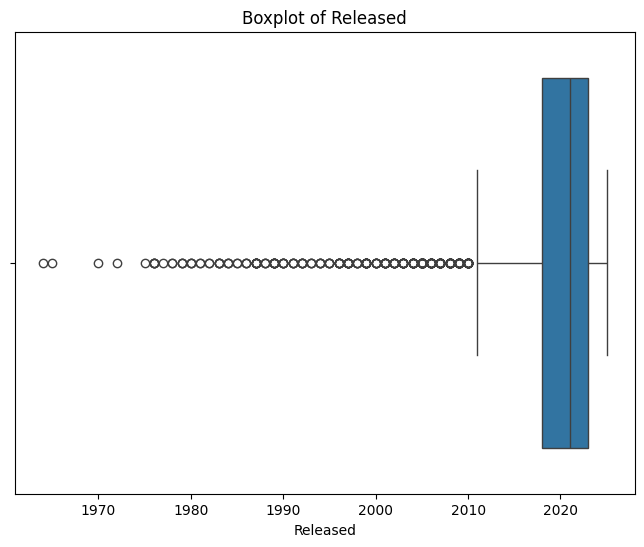

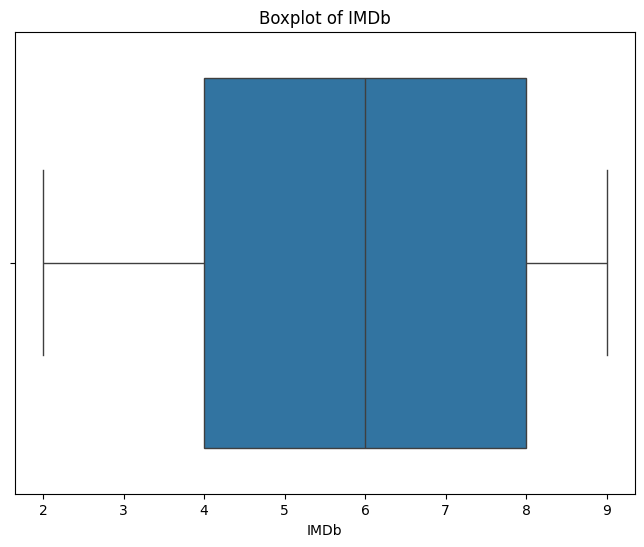

In [ ]:
# Create boxplots for 'Released' and 'IMDb'
for column in ['Released', 'IMDb']:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
print(df)

      ï»¿User_ID                                Title Name Language  Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English    2021.0   
1             13                           Black Hawk Down  English    2002.0   
2             20                                    Canvas  English    2021.0   
3             12  Captain Underpants: The First Epic Movie  English    2018.0   
4             13                            Ella Enchanted  English    2005.0   
...          ...                                       ...      ...       ...   
4443          17                           Mae Martin: SAP  English    2024.0   
4444          15       Michela Giraud: The Truth, I Swear!  Italian    2023.0   
4445           9                              The Disciple  Marathi    2021.0   
4446          23                             The Privilege   German    2023.0   
4447          12               Barbie & the Diamond Castle  English    2009.0   

      Age_Rating  IMDb  
0 

In [ ]:
# prompt: how to remove outlier for released and replacing it with its median

# Calculate the median of 'Released'
median_released = df['Released'].median()

# Identify outliers in 'Released' using IQR
Q1 = df['Released'].quantile(0.25)
Q3 = df['Released'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
df.loc[(df['Released'] < lower_bound) | (df['Released'] > upper_bound), 'Released'] = median_released


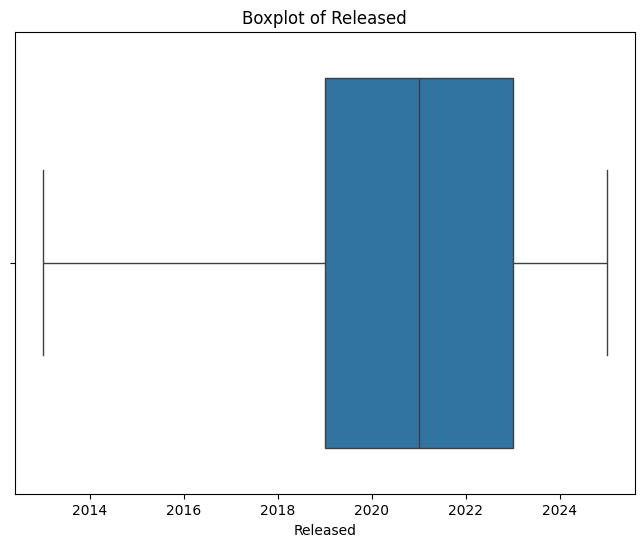

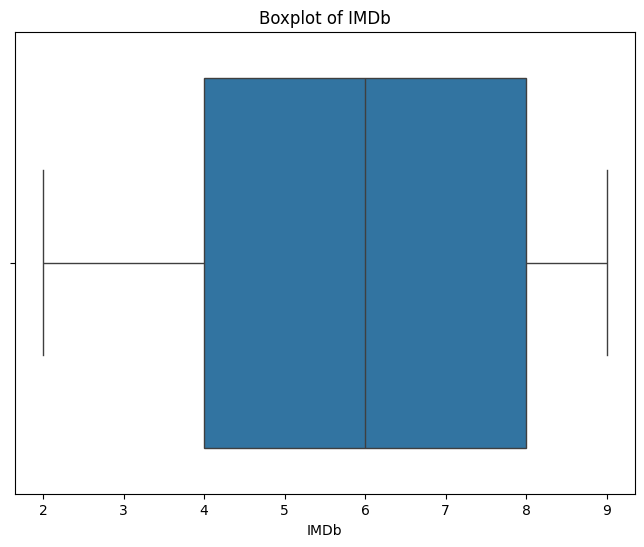

In [ ]:
# Create boxplots for 'Released' and 'IMDb'
for column in ['Released', 'IMDb']:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# 2.1 Normalize Numerical Features

In [ ]:
# Select numerical features for normalization
numerical_features = ['Released', 'IMDb']  # Replace with your actual numerical feature names

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the DataFrame to verify the changes (optional)
print(df)

      ï»¿User_ID                                Title Name Language  Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English  0.666667   
1             13                           Black Hawk Down  English  0.666667   
2             20                                    Canvas  English  0.666667   
3             12  Captain Underpants: The First Epic Movie  English  0.416667   
4             13                            Ella Enchanted  English  0.666667   
...          ...                                       ...      ...       ...   
4443          17                           Mae Martin: SAP  English  0.916667   
4444          15       Michela Giraud: The Truth, I Swear!  Italian  0.833333   
4445           9                              The Disciple  Marathi  0.666667   
4446          23                             The Privilege   German  0.833333   
4447          12               Barbie & the Diamond Castle  English  0.666667   

      Age_Rating      IMDb 

In [ ]:
# Select numerical features for normalization (e.g., 'Released', 'IMDb')
numerical_features = ['Released', 'IMDb'] # Defines the numerical features to be normalized

In [ ]:
# Apply Min-Max scaling
scaler = MinMaxScaler() # Creates a MinMaxScaler object
df[numerical_features] = scaler.fit_transform(df[numerical_features]) # Applies Min-Max scaling to the selected features

In [ ]:
# Print after normalization
print("\nDataFrame after numerical feature normalization:") # Prints a header
print(df) # Prints the DataFrame after normalization


DataFrame after numerical feature normalization:
      ï»¿User_ID                                Title Name Language  Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English  0.666667   
1             13                           Black Hawk Down  English  0.666667   
2             20                                    Canvas  English  0.666667   
3             12  Captain Underpants: The First Epic Movie  English  0.416667   
4             13                            Ella Enchanted  English  0.666667   
...          ...                                       ...      ...       ...   
4443          17                           Mae Martin: SAP  English  0.916667   
4444          15       Michela Giraud: The Truth, I Swear!  Italian  0.833333   
4445           9                              The Disciple  Marathi  0.666667   
4446          23                             The Privilege   German  0.833333   
4447          12               Barbie & the Diamond Castle 

In [ ]:
print(df)

      ï»¿User_ID                                Title Name Language  Released  \
0              2      A Shaun the Sheep Movie: Farmageddon  English  0.666667   
1             13                           Black Hawk Down  English  0.666667   
2             20                                    Canvas  English  0.666667   
3             12  Captain Underpants: The First Epic Movie  English  0.416667   
4             13                            Ella Enchanted  English  0.666667   
...          ...                                       ...      ...       ...   
4443          17                           Mae Martin: SAP  English  0.916667   
4444          15       Michela Giraud: The Truth, I Swear!  Italian  0.833333   
4445           9                              The Disciple  Marathi  0.666667   
4446          23                             The Privilege   German  0.833333   
4447          12               Barbie & the Diamond Castle  English  0.666667   

      Age_Rating      IMDb 